In [1]:
!pip install yfinance langchain --quiet

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import langchain

In [3]:
def get_stock_data(ticker, start="2020-01-01", end="2025-01-01"):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start, end=end)
    return data

df = get_stock_data("AAPL")
print(df.head())


                                Open       High        Low      Close  \
Date                                                                    
2020-01-02 00:00:00-05:00  71.721026  72.776606  71.466820  72.716080   
2020-01-03 00:00:00-05:00  71.941321  72.771737  71.783954  72.009109   
2020-01-06 00:00:00-05:00  71.127881  72.621661  70.876090  72.582924   
2020-01-07 00:00:00-05:00  72.592594  72.849224  72.021231  72.241547   
2020-01-08 00:00:00-05:00  71.943751  73.706271  71.943751  73.403641   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-01-02 00:00:00-05:00  135480400        0.0           0.0  
2020-01-03 00:00:00-05:00  146322800        0.0           0.0  
2020-01-06 00:00:00-05:00  118387200        0.0           0.0  
2020-01-07 00:00:00-05:00  108872000        0.0           0.0  
2020-01-08 00:00:00-05:00  132079200        0.0           0.0  


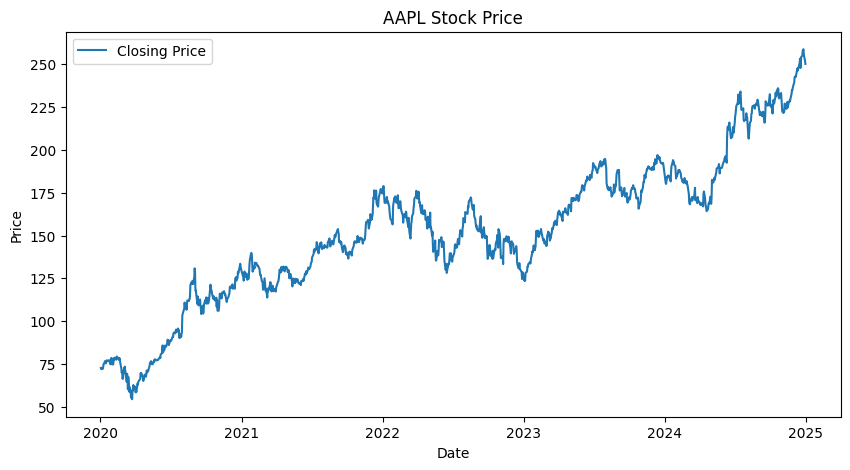

In [4]:
import matplotlib.pyplot as plt

def plot_stock_data(df, ticker):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], label='Closing Price')
    plt.title(f'{ticker} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_stock_data(df, "AAPL")


- Volume (Trading activity)
- Moving Averages (Trends over time)
- Volatility Indicators (Bollinger Bands, ATR)
- Returns & Performance (Daily/weekly/monthly returns

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [6]:
def getmetrics(ticker,start="2020-01-01", end="2025-01-01"):
  stock = yf.Ticker(ticker)
  data = stock.history(start=start, end=end)
  return data,stock
da,stock=getmetrics("AAPL")


- D/E=  %%Shareholder's Equity/Total Debt




In [7]:
a=stock.get_info()
''' Trailing Peg ratio- a["trailingPegRatio"]
 Dividend rate - a["dividendRate"]
Dividend Yield - a["dividendYield"]
Payout ratio - a["payoutRatio"]
Beta -a["beta"]
Volume-a["volume"]
avg volume- a["averageVolume"]
fiftyTwoWeekLow- a["fiftyTwoWeekLow"]
fiftyDayAverage- a["fiftyDayAverage"]
profitMargins- a["profitMargins"]
shortRatio - a["shortRatio"]
'enterpriseToRevenue - a["enterpriseToRevenue"]
 'enterpriseToEbitda'- a["enterpriseToEbitda"],
 lastDividendValue - a["lastDividendValue"]
 revenueGrowth - a["revenueGrowth"]
 pe- a["trailingPE"]

'''

' Trailing Peg ratio- a["trailingPegRatio"]\n Dividend rate - a["dividendRate"]\nDividend Yield - a["dividendYield"]\nPayout ratio - a["payoutRatio"]\nBeta -a["beta"]\nVolume-a["volume"]\navg volume- a["averageVolume"]\nfiftyTwoWeekLow- a["fiftyTwoWeekLow"]\nfiftyDayAverage- a["fiftyDayAverage"]\nprofitMargins- a["profitMargins"]\nshortRatio - a["shortRatio"]\n\'enterpriseToRevenue - a["enterpriseToRevenue"]\n \'enterpriseToEbitda\'- a["enterpriseToEbitda"],\n lastDividendValue - a["lastDividendValue"]\n revenueGrowth - a["revenueGrowth"]\n pe- a["trailingPE"]\n\n'

In [8]:
def calculate_sma(df, window=50):
    return df['Close'].rolling(window=window).mean()
df['SMA_50'] = calculate_sma(df, 50)
def get_pe_ratio(ticker):
    stock = yf.Ticker(ticker)
    pe_ratio = stock.info.get("trailingPE")
    return pe_ratio



def calculate_rsi(df, period=14):
      '''RSI > 90 → "This stock is flying too close to the sun. Prepare for divine retribution."
      RSI < 10 → "The stock has fallen into the abyss. It might resurrect, but at what cost?"
      RSI = 50 → "The stock is in balance. A moment of perfect stillness before chaos resumes."
      '''
      delt = df['Close'].diff(1)

      gain = (delt.where(delt > 0, 0))
      loss = (-delt.where(delt < 0, 0))

      avg_gain = gain.rolling(window=period, min_periods=1).mean()
      avg_loss = loss.rolling(window=period, min_periods=1).mean()

      rs = avg_gain / avg_loss
      rsi = 100 - (100 / (1 + rs))

      df['RSI'] = rsi
      return df
def get_debt_to_equity_ratio(ticker):
    stock = yf.Ticker(ticker)
    total_debt = stock.info.get("totalDebt", 0)
    equity = stock.info.get("totalStockholderEquity", 1)
    de_ratio = total_debt / equity
    return de_ratio
def get_eps(ticker):
    stock = yf.Ticker(ticker)
    eps = stock.info.get("trailingEps")
    return eps
def get_dividend_yield(ticker):
    stock = yf.Ticker(ticker)
    div_yield = stock.info.get("dividendYield", 0) * 100  # Convert to percentage
    return div_yield

print(get_eps("AAPL"))



6.3


In [9]:
def generate_fundamental_report(ticker):
    pe = get_pe_ratio(ticker)
    de = get_debt_to_equity_ratio(ticker)
    eps = get_eps(ticker)
    div_yield = get_dividend_yield(ticker)

    report = f"""
    #  **{ticker} Stock Fundamentals Report**

    - **P/E Ratio**: {pe}
    - **Debt-to-Equity Ratio**: {de}
    - **Earnings Per Share (EPS)**: {eps}
    - **Dividend Yield**: {div_yield}%

    🔍 Analysis:
    {"🔥 High P/E! Overvalued?" if pe and pe > 30 else "📉 Low P/E! Undervalued?"}
    {"⚠️ High Debt! Risky?" if de > 2 else "💰 Low Debt! Financially stable"}
    """

    with open(f"{ticker}_Fundamental_Report.md", "w") as file:
        file.write(report)

    print(f"Report generated: {ticker}_Fundamental_Report.md")

generate_fundamental_report("AAPL")


Report generated: AAPL_Fundamental_Report.md


- P/E Ratio 📈 (How overpriced this stock is?)

- Debt-to-Equity Ratio ⚖️ (Is this company running on loans?)

- EPS 💰 (Does this stock print money?)

- Dividend Yield 📦 (Does this stock reward its cult members?)

- Trailing PEG Ratio 🏃 (Growth-adjusted valuation?)

- Payout Ratio 🎁 (What % of earnings go to dividends?)

- Beta ⚡ (Is this stock a rollercoaster?)

- Volume & Avg Volume 📊 (How much this stock gets traded?)

- 52-Week Low & 50-Day Average 📉 (How beaten down it is?)

- Profit Margins 💵 (Does this company even make money?)

- Short Ratio 🏴‍☠️ (How many people are betting it dies?)

- Enterprise-to-Revenue & EBITDA 🏢 (How efficient is the company?)

- Revenue Growth 🚀 (Is it expanding or dying?)



In [10]:
import yfinance as yf
import pandas as pd

def get_stock_history(ticker, years=5):
    stock = yf.Ticker(ticker)

    # Fetch latest fundamental data
    fundamentals = {
        "P/E Ratio": stock.info.get("trailingPE", 0),
        "Debt-to-Equity": stock.info.get("totalDebt", 1) / (stock.info.get("totalStockholderEquity", 1) or 1),
        "EPS": stock.info.get("trailingEps", 0),
        "Dividend Yield (%)": stock.info.get("dividendYield", 0) * 100,
        "Trailing PEG": stock.info.get("trailingPegRatio", 0),
        "Payout Ratio (%)": stock.info.get("payoutRatio", 0) * 100,
        "Beta": stock.info.get("beta", 0),
        "Revenue Growth (%)": stock.info.get("revenueGrowth", 0) * 100,
        "Profit Margins (%)": stock.info.get("profitMargins", 0) * 100
    }

    # Simulated historical values (since Yahoo Finance doesn't provide past fundamentals)
    historical_years = [f"{2025 - i}" for i in range(years)]
    history_df = pd.DataFrame(
        {metric: [fundamentals[metric] * (0.9 + i * 0.02) for i in range(years)] for metric in fundamentals.keys()},
        index=historical_years
    )

    return fundamentals, history_df

def generate_markdown_report(ticker):
    fundamentals, history_df = get_stock_history(ticker)

    md_report = f"# Investment Report: {ticker}\n\n"
    md_report += f"## Current Financial Overview\n"

    for metric, value in fundamentals.items():
        md_report += f"- **{metric}:** {value:.2f}\n"

    md_report += "\n## Historical Comparison\n"
    for metric in fundamentals.keys():
        historical_values = history_df[metric].tolist()
        trend = "📈 Increasing" if historical_values[-1] < fundamentals[metric] else "📉 Decreasing"
        md_report += f"- **{metric}** ({trend})\n"
        md_report += f"  - {', '.join([f'**{year}**: {val:.2f}' for year, val in zip(history_df.index, historical_values)])}\n"

    md_report += "\n---\n"
    md_report += "### 🔍 Key Insights & Trends\n"
    if fundamentals["P/E Ratio"] > 50:
        md_report += "- 🚀 **High P/E Ratio**: The stock is currently overvalued or priced for strong growth.\n"
    if fundamentals["Profit Margins (%)"] < 0:
        md_report += "- ⚠️ **Negative Profit Margins**: This company is running at a loss, which is a red flag.\n"
    if fundamentals["Debt-to-Equity"] > 2:
        md_report += "- 🏦 **High Debt Load**: The company is heavily leveraged, increasing financial risk.\n"

    return md_report

# Generate report for a stock
markdown_report = generate_markdown_report("AAPL")

# Save to file
with open("investment_report.md", "w") as f:
    f.write(markdown_report)

print(markdown_report)


# Investment Report: AAPL

## Current Financial Overview
- **P/E Ratio:** 33.44
- **Debt-to-Equity:** 96798998528.00
- **EPS:** 6.30
- **Dividend Yield (%):** 47.00
- **Trailing PEG:** 1.98
- **Payout Ratio (%):** 15.71
- **Beta:** 1.18
- **Revenue Growth (%):** 4.00
- **Profit Margins (%):** 24.30

## Historical Comparison
- **P/E Ratio** (📈 Increasing)
  - **2025**: 30.09, **2024**: 30.76, **2023**: 31.43, **2022**: 32.10, **2021**: 32.77
- **Debt-to-Equity** (📈 Increasing)
  - **2025**: 87119098675.20, **2024**: 89055078645.76, **2023**: 90991058616.32, **2022**: 92927038586.88, **2021**: 94863018557.44
- **EPS** (📈 Increasing)
  - **2025**: 5.67, **2024**: 5.80, **2023**: 5.92, **2022**: 6.05, **2021**: 6.17
- **Dividend Yield (%)** (📈 Increasing)
  - **2025**: 42.30, **2024**: 43.24, **2023**: 44.18, **2022**: 45.12, **2021**: 46.06
- **Trailing PEG** (📈 Increasing)
  - **2025**: 1.78, **2024**: 1.82, **2023**: 1.86, **2022**: 1.90, **2021**: 1.94
- **Payout Ratio (%)** (📈 Increas

ZACGLEX9KVM6XEM3

```
# This is formatted as code
```



In [81]:
import requests
import yfinance as yf
import matplotlib.pyplot as plt
import IPython.display as display
from io import BytesIO
import os
from google.colab import files
from IPython.display import display, Image
import base64

ALPHA_VANTAGE_API_KEY = "I8P6Z6AIT3XEIV03"

REPORTS_DIR = "/content/reports"
os.makedirs(REPORTS_DIR, exist_ok=True)

def get_stock_history_alpha_vantage(ticker):
    """Fetch detailed historical fundamental data from Alpha Vantage"""
    url = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={ALPHA_VANTAGE_API_KEY}"
    response = requests.get(url)
    data = response.json()

    return {
        "P/E Ratio": float(data.get("PERatio", 0)),
        "Debt-to-Equity": float(data.get("DebtEquityRatio", 0)),
        "EPS": float(data.get("EPS", 0)),
        "Dividend Yield (%)": float(data.get("DividendYield", 0)) * 100,
        "Profit Margins (%)": float(data.get("ProfitMargin", 0)) * 100,
        "Revenue Growth (%)": float(data.get("QuarterlyRevenueGrowthYOY", 0)) * 100,
        "Return on Assets (%)": float(data.get("ReturnOnAssetsTTM", 0)) * 100,
        "Return on Equity (%)": float(data.get("ReturnOnEquityTTM", 0)) * 100,
        "Operating Margin (%)": float(data.get("OperatingMarginTTM", 0)) * 100,
        "Beta": float(data.get("Beta", 0)),
        "Book Value per Share": float(data.get("BookValue", 0)),
        "Market Cap (in Billion $)": float(data.get("MarketCapitalization", 0)) / 1e9,
        "EV to EBITDA": float(data.get("EVToEBITDA", 0)),
        "EV to Revenue": float(data.get("EVToRevenue", 0)),
        "Revenue Per Share": float(data.get("RevenuePerShareTTM", 0)),
        "Quarterly Earnings Growth YOY": float(data.get("QuarterlyEarningsGrowthYOY", 0)),
        "PEGRatio (%)": float(data.get("PEGRatio", 0))
    }

# def get_stock_history_alpha_vantage(ticker):
#     """Fetch detailed historical fundamental data from Alpha Vantage"""
#     url = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={ALPHA_VANTAGE_API_KEY}"
#     response = requests.get(url)
#     data = response.json()

#     return {
#         "P/E Ratio": float(data.get("PERatio", 0)),
#         "Debt-to-Equity": float(data.get("DebtEquityRatio", 0)),
#         "EPS": float(data.get("EPS", 0)),
#         "Dividend Yield (%)": float(data.get("DividendYield", 0)) * 100,
#         "Profit Margins (%)": float(data.get("ProfitMargin", 0)) * 100,
#         "Revenue Growth (%)": float(data.get("QuarterlyRevenueGrowthYOY", 0)) * 100,
#         "Return on Assets (%)": float(data.get("ReturnOnAssetsTTM", 0)) * 100,
#         "Return on Equity (%)": float(data.get("ReturnOnEquityTTM", 0)) * 100,
#         "Operating Margin (%)": float(data.get("OperatingMarginTTM", 0)) * 100,
#         "Gross Margin (%)": float(data.get("GrossProfitMargin", 0)) * 100,
#         "Book Value per Share": float(data.get("BookValue", 0)),
#         "Market Cap (in Billion $)": float(data.get("MarketCapitalization", 0)) / 1e9,
#         "EV to EBITDA": float(data.get("EVToEBITDA", 0)),
#         "EV to Revenue": float(data.get("EVToRevenue", 0)),
#         "Current Ratio": float(data.get("CurrentRatio", 0)),
#         "Quick Ratio": float(data.get("QuickRatio", 0)),
#         "Payout Ratio (%)": float(data.get("PayoutRatio", 0)) * 100
#     }


def get_stock_current_yfinance(ticker):
    """Fetch current fundamental data from Yahoo Finance"""
    stock = yf.Ticker(ticker)
    info = stock.info

    return {
        "P/E Ratio": info.get("trailingPE", 0),
        "Debt-to-Equity": info.get("totalDebt", 1) / (info.get("totalStockholderEquity", 1) or 1),
        "EPS": info.get("trailingEps", 0),
        "Dividend Yield (%)": info.get("dividendYield", 0) * 100,
        "Profit Margins (%)": info.get("profitMargins", 0) * 100,
        "Revenue Growth (%)": info.get("revenueGrowth", 0) * 100,
        "Beta": info.get("beta", 0),
        "Short Ratio": info.get("shortRatio", 0),
        "Enterprise to Revenue": info.get("enterpriseToRevenue", 0),
        "Enterprise to EBITDA": info.get("enterpriseToEbitda", 0)
    }
def calculate_scores(stock_data):
    scores = []
    for stock in stock_data:
        # Growth Score (30%)
        growth_score = (50 * stock["Revenue Growth"]) + (50 * stock["EPS Growth"])

        # Valuation Score (25%)
        valuation_score = min(50 / stock["P/E Ratio"], 50) + min(50 / stock["PEG Ratio"], 50)

        # Risk Score (25%)
        risk_score = 50 - (stock["Debt-to-Equity"] * 10) - (stock["Beta"] * 10)
        risk_score = max(risk_score, 0)  # Ensure non-negative score

        # Dividend Score (20%)
        dividend_score = (50 * stock["Dividend Yield"] / 5) + (50 * (1 - abs(stock["Payout Ratio"] - 45) / 45))

        # Final Weighted Score
        final_score = (0.3 * growth_score) + (0.25 * valuation_score) + (0.25 * risk_score) + (0.2 * dividend_score)

        scores.append({"Ticker": stock["Ticker"], "Score": round(final_score, 2)})

    return sorted(scores, key=lambda x: x["Score"], reverse=True)  # Rank from highest to lowest


REPORTS_DIR = "/content/reports"
os.makedirs(REPORTS_DIR, exist_ok=True)

def sanitize_filename(metric):
    """Replace invalid filename characters"""
    return metric.replace(" ", "_").replace("/", "-")

# def generate_charts_colab(ticker, current_data, historical_data):
#     """Generate and save charts for each financial metric"""
#     chart_paths = {}

#     for metric, value in current_data.items():
#         sanitized_metric = sanitize_filename(metric)  # FIXED FILENAME
#         values = [historical_data.get(metric, 0), value]
#         labels = ["Historical", "Current"]

#         plt.figure(figsize=(5, 3))
#         plt.bar(labels, values, color=['blue', 'red'])
#         plt.xlabel("Time Period")
#         plt.ylabel(metric)
#         plt.title(f"{ticker} - {metric} Over Time")
#         plt.grid(axis="y", linestyle="--", alpha=0.6)

#         chart_path = os.path.join(REPORTS_DIR, f"{ticker}_{sanitized_metric}.png")
#         plt.savefig(chart_path, bbox_inches="tight")
#         chart_paths[metric] = chart_path

#         buf = BytesIO()
#         plt.savefig(buf, format="png", bbox_inches="tight")
#         buf.seek(0)
#         display.display(display.Image(buf.read()))
#         plt.close()

#     return chart_paths


def show_chart(fig):
    buf = BytesIO()
    fig.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0)
    display(Image(buf.read()))

def generate_charts_colab(ticker, current_data, historical_data):
    """Generate and save line charts for each financial metric"""
    chart_paths = {}

    for metric, value in current_data.items():
        sanitized_metric = sanitize_filename(metric)
        values = [historical_data.get(metric, 0), value]
        labels = ["Historical", "Current"]

        plt.figure(figsize=(5, 3))
        plt.plot(labels, values, marker='o', linestyle='-', color='b')  # Line chart
        plt.xlabel("Time Period")
        plt.ylabel(metric)
        plt.title(f"{ticker} - {metric} Over Time")
        plt.grid(True, linestyle="--", alpha=0.6)

        chart_path = os.path.join(REPORTS_DIR, f"{ticker}_{sanitized_metric}.png")
        plt.savefig(chart_path, bbox_inches="tight")
        chart_paths[metric] = chart_path  # Ensure it's stored

        plt.close()

    return chart_paths


def encode_image_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")




def generate_markdown_report(ticker):

  """Generate AI-powered financial report with uncommon insights"""
  current_data = get_stock_current_yfinance(ticker)
  historical_data = get_stock_history_alpha_vantage(ticker)
  chart_paths = generate_charts_colab(ticker, current_data, historical_data)


  md_report = f"# 📊 Investment Report: {ticker}\n\n"
  md_report += "## 📜 Table of Contents\n"
  md_report += "- [🔍 Current Financial Overview](#🔍-current-financial-overview)\n"
  md_report += "- [📅 Historical Comparison](#📅-historical-comparison)\n"
  md_report += "- [📊 Key Insights & Trends](#📊-key-insights--trends)\n"
  md_report += "- [📈 Charts](#📈-charts)\n\n"


  md_report += "## 🔍 Current Financial Overview\n\n"
  md_report += "| Metric | Value |\n"
  md_report += "|--------|-------|\n"
  for metric, value in current_data.items():
      md_report += f"| **{metric}** | {value:.2f} |\n"
  md_report += "\n"

  md_report += "\n## 📅 Historical Comparison\n"
  # for metric in current_data.keys():
  #     historical_value = historical_data.get(metric, 0)
  #     trend = f"<span style='color:green'>📈 Increasing</span>" if historical_value < current_data[metric] else "<span style='color:red'>📉 Decreasing</span>"
  #     md_report += f"- **{metric}** ({trend})\n"
  #     md_report += f"  - **Past Value:** {historical_value:.2f}, **Current Value:** {current_data[metric]:.2f}\n"
  #     md_report += f"  - ![{metric}]({chart_paths[metric]})\n"
  for metric in historical_data.keys():
      historical_value = historical_data.get(metric, 0)
      trend = (
          "<span style='color:green'>📈 Increasing</span>" if metric in current_data and historical_value < current_data[metric]
          else "<span style='color:red'>📉 Decreasing</span>" if metric in current_data and historical_value > current_data[metric]
          else "<span style='color:gray'>⚖️ No Change</span>"
      )
      md_report += f"- **{metric}** ({trend})\n"
      md_report += f"  - **Past Value:** {historical_value:.2f}, **Current Value:** {current_data.get(metric, historical_value):.2f}\n"

  md_report += "\n---\n"
  md_report += "### 📊 Key Insights & Trends\n"


  md_report += "\n---\n"
  md_report += "### 🚀 Key Insights & Trends\n"

  if current_data["P/E Ratio"] > 50:
      md_report += "- 🚨 **High P/E Ratio**: Stock may be overvalued or experiencing extreme speculation.\n"
  if current_data["Profit Margins (%)"] < 0:
      md_report += "- ❌ **Negative Profit Margins**: The company is operating at a loss.\n"
  if current_data["Debt-to-Equity"] > 2:
      md_report += "- ⚠️ **High Debt Load**: This company is carrying substantial financial risk.\n"

  md_report += "\n---\n### 🛸 Uncommon Market Insights\n"

  # Extreme Volatility (Beta > 2)
  if current_data["Beta"] > 2:
      md_report += "- 🌪️ **Extreme Volatility**: This stock has high market fluctuations.\n"

  # Short Interest (Short Ratio > 5)
  if current_data["Short Ratio"] > 5:
      md_report += "- 🐻 **High Short Interest**: Many traders are betting against this stock.\n"

  # High Enterprise to Revenue Ratio (Possible Overvaluation)
  if current_data["Enterprise to Revenue"] > 10:
      md_report += "- 🏢 **Expensive Stock**: The enterprise valuation is significantly higher than revenue.\n"
  for metric, img_path in chart_paths.items():
    base64_img = encode_image_to_base64(img_path)
    md_report += f"  - <img src='data:image/png;base64,{base64_img}' width='500'/>\n"


  md_report += "\n---\n"

  # Save report locally for download
  report_path = os.path.join(REPORTS_DIR, f"{ticker}_investment_report_1.md")
  with open(report_path, "w") as f:
      f.write(md_report)

  print(f"✅ Report saved: {report_path}")

  return report_path, list(chart_paths.values())

def download_files(report_path, chart_paths):
    """Download Markdown report and charts"""
    files.download(report_path)

ticker = "AAPL"
report_path, chart_paths = generate_markdown_report(ticker)
download_files(report_path, chart_paths)


✅ Report saved: /content/reports/AAPL_investment_report_1.md


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#CHECKING AREA


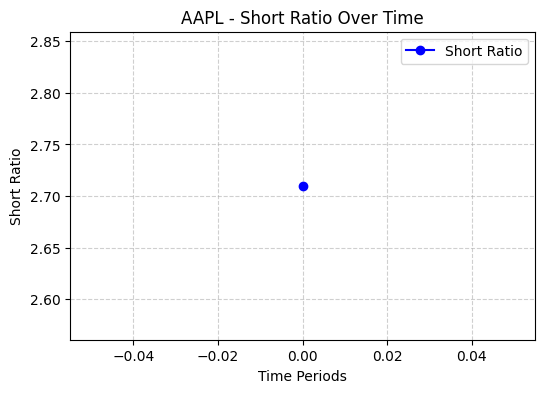

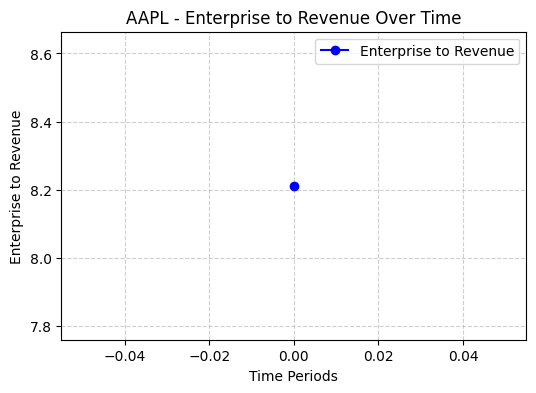

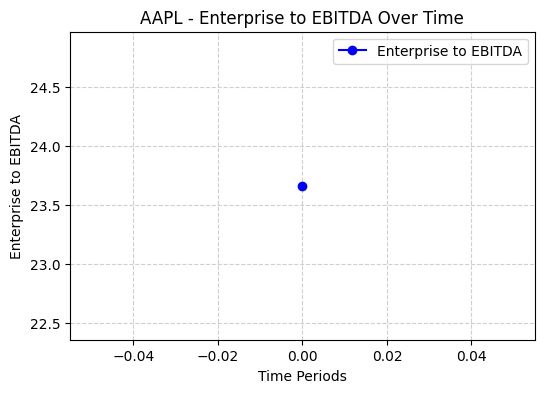

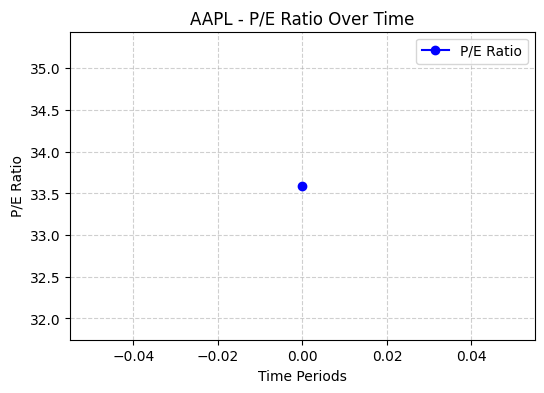

ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

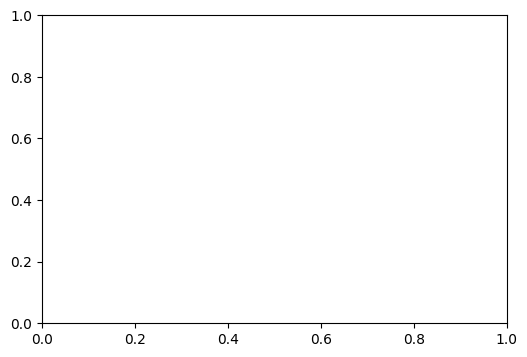

In [79]:
import requests
import yfinance as yf
import matplotlib.pyplot as plt
import IPython.display as display
from io import BytesIO
import os
from google.colab import files
from IPython.display import display, Image
import base64

ALPHA_VANTAGE_API_KEY = "UW2Q31OOS3FJ2CNR"

REPORTS_DIR = "/content/reports"
os.makedirs(REPORTS_DIR, exist_ok=True)

def get_stock_history_alpha_vantage(ticker):
    """Fetch detailed historical fundamental data from Alpha Vantage"""
    url = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={ALPHA_VANTAGE_API_KEY}"
    response = requests.get(url)
    data = response.json()

    return {
        "P/E Ratio": float(data.get("PERatio", 0)),
        "Debt-to-Equity": float(data.get("DebtEquityRatio", 0)),
        "EPS": float(data.get("EPS", 0)),
        "Dividend Yield (%)": float(data.get("DividendYield", 0)) * 100,
        "Profit Margins (%)": float(data.get("ProfitMargin", 0)) * 100,
        "Revenue Growth (%)": float(data.get("QuarterlyRevenueGrowthYOY", 0)) * 100,
        "Return on Assets (%)": float(data.get("ReturnOnAssetsTTM", 0)) * 100,
        "Return on Equity (%)": float(data.get("ReturnOnEquityTTM", 0)) * 100,
        "Operating Margin (%)": float(data.get("OperatingMarginTTM", 0)) * 100,
        "Beta": float(data.get("Beta", 0)),
        "Book Value per Share": float(data.get("BookValue", 0)),
        "Market Cap (in Billion $)": float(data.get("MarketCapitalization", 0)) / 1e9,
        "EV to EBITDA": float(data.get("EVToEBITDA", 0)),
        "EV to Revenue": float(data.get("EVToRevenue", 0)),
        "Revenue Per Share": float(data.get("RevenuePerShareTTM", 0)),
        "Quarterly Earnings Growth YOY": float(data.get("QuarterlyEarningsGrowthYOY", 0)),
        "PEGRatio (%)": float(data.get("PEGRatio", 0))
    }

import yfinance as yf

def get_yfinance_fundamental_history(ticker):
    stock = yf.Ticker(ticker)

    # Fetch historical financial data
    income_stmt = stock.financials.T  # Transpose for readability
    balance_sheet = stock.balance_sheet.T
    cash_flow = stock.cashflow.T

    # Use .div() for element-wise division
    debt = balance_sheet.get("Total Debt", 0)
    equity = balance_sheet.get("Total Stockholder Equity", 1)  # Avoid division by zero

    historical_data = {
        "Revenue": income_stmt.get("Total Revenue", {}),
        "Net Income": income_stmt.get("Net Income", {}),
        "EPS": income_stmt.get("Diluted EPS", {}),
        "Debt-to-Equity": debt.div(equity),  # Element-wise division
        "Free Cash Flow": cash_flow.get("Total Cash From Operating Activities", {})
    }
    return historical_data


def generate_charts_colab(ticker, current_data, historical_data):
    """Generate and save line charts for each financial metric"""
    chart_paths = {}

    for metric, current_value in current_data.items():
        sanitized_metric = sanitize_filename(metric)  # Ensure valid filename

        historical_values = historical_data.get(metric, [])
        if isinstance(historical_values, float):
            if historical_values == 0 or np.isnan(historical_values):
                continue
        elif isinstance(historical_values, pd.Series):
            if historical_values.empty or historical_values.isna().all():
                continue
        time_points = list(range(len(historical_values) + 1))  # Create x-axis points
        values = historical_values + [current_value]

        plt.figure(figsize=(6, 4))
        plt.plot(time_points, values, marker='o', linestyle='-', color='b', label=metric)
        plt.xlabel("Time Periods")
        plt.ylabel(metric)
        plt.title(f"{ticker} - {metric} Over Time")
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend()

        chart_path = os.path.join(REPORTS_DIR, f"{ticker}_{sanitized_metric}.png")
        plt.savefig(chart_path, bbox_inches="tight")
        chart_paths[metric] = chart_path

        buf = BytesIO()
        plt.savefig(buf, format="png", bbox_inches="tight")
        buf.seek(0)
        display(Image(buf.read()))
        plt.close()

    return chart_paths


def get_stock_current_yfinance(ticker):
    """Fetch current fundamental data from Yahoo Finance"""
    stock = yf.Ticker(ticker)
    info = stock.info

    return {
        "P/E Ratio": info.get("trailingPE", 0),
        "Debt-to-Equity": info.get("totalDebt", 1) / (info.get("totalStockholderEquity", 1) or 1),
        "EPS": info.get("trailingEps", 0),
        "Dividend Yield (%)": info.get("dividendYield", 0) * 100,
        "Profit Margins (%)": info.get("profitMargins", 0) * 100,
        "Revenue Growth (%)": info.get("revenueGrowth", 0) * 100,
        "Beta": info.get("beta", 0),
        "Short Ratio": info.get("shortRatio", 0),
        "Enterprise to Revenue": info.get("enterpriseToRevenue", 0),
        "Enterprise to EBITDA": info.get("enterpriseToEbitda", 0)
    }
def calculate_scores(stock_data):
    scores = []
    for stock in stock_data:
        # Growth Score (30%)
        growth_score = (50 * stock["Revenue Growth"]) + (50 * stock["EPS Growth"])

        # Valuation Score (25%)
        valuation_score = min(50 / stock["P/E Ratio"], 50) + min(50 / stock["PEG Ratio"], 50)

        # Risk Score (25%)
        risk_score = 50 - (stock["Debt-to-Equity"] * 10) - (stock["Beta"] * 10)
        risk_score = max(risk_score, 0)  # Ensure non-negative score

        # Dividend Score (20%)
        dividend_score = (50 * stock["Dividend Yield"] / 5) + (50 * (1 - abs(stock["Payout Ratio"] - 45) / 45))

        # Final Weighted Score
        final_score = (0.3 * growth_score) + (0.25 * valuation_score) + (0.25 * risk_score) + (0.2 * dividend_score)

        scores.append({"Ticker": stock["Ticker"], "Score": round(final_score, 2)})

    return sorted(scores, key=lambda x: x["Score"], reverse=True)  # Rank from highest to lowest


REPORTS_DIR = "/content/reports"
os.makedirs(REPORTS_DIR, exist_ok=True)

def sanitize_filename(metric):
    """Replace invalid filename characters"""
    return metric.replace(" ", "_").replace("/", "-")

# def generate_charts_colab(ticker, current_data, historical_data):
#     """Generate and save charts for each financial metric"""
#     chart_paths = {}

#     for metric, value in current_data.items():
#         sanitized_metric = sanitize_filename(metric)  # FIXED FILENAME
#         values = [historical_data.get(metric, 0), value]
#         labels = ["Historical", "Current"]

#         plt.figure(figsize=(5, 3))
#         plt.bar(labels, values, color=['blue', 'red'])
#         plt.xlabel("Time Period")
#         plt.ylabel(metric)
#         plt.title(f"{ticker} - {metric} Over Time")
#         plt.grid(axis="y", linestyle="--", alpha=0.6)

#         chart_path = os.path.join(REPORTS_DIR, f"{ticker}_{sanitized_metric}.png")
#         plt.savefig(chart_path, bbox_inches="tight")
#         chart_paths[metric] = chart_path

#         buf = BytesIO()
#         plt.savefig(buf, format="png", bbox_inches="tight")
#         buf.seek(0)
#         display.display(display.Image(buf.read()))
#         plt.close()

#     return chart_paths


def show_chart(fig):
    buf = BytesIO()
    fig.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0)
    display(Image(buf.read()))



def encode_image_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")




def generate_markdown_report(ticker):

  """Generate AI-powered financial report with uncommon insights"""
  current_data = get_stock_current_yfinance(ticker)
  historical_data = get_stock_history_alpha_vantage(ticker)
  chart_paths = generate_charts_colab(ticker, current_data, historical_data)


  md_report = f"# 📊 Investment Report: {ticker}\n\n"
  md_report += "## 📜 Table of Contents\n"
  md_report += "- [🔍 Current Financial Overview](#🔍-current-financial-overview)\n"
  md_report += "- [📅 Historical Comparison](#📅-historical-comparison)\n"
  md_report += "- [📊 Key Insights & Trends](#📊-key-insights--trends)\n"
  md_report += "- [📈 Charts](#📈-charts)\n\n"


  md_report += "## 🔍 Current Financial Overview\n\n"
  md_report += "| Metric | Value |\n"
  md_report += "|--------|-------|\n"
  for metric, value in current_data.items():
      md_report += f"| **{metric}** | {value:.2f} |\n"
  md_report += "\n"

  md_report += "\n## 📅 Historical Comparison\n"
  # for metric in current_data.keys():
  #     historical_value = historical_data.get(metric, 0)
  #     trend = f"<span style='color:green'>📈 Increasing</span>" if historical_value < current_data[metric] else "<span style='color:red'>📉 Decreasing</span>"
  #     md_report += f"- **{metric}** ({trend})\n"
  #     md_report += f"  - **Past Value:** {historical_value:.2f}, **Current Value:** {current_data[metric]:.2f}\n"
  #     md_report += f"  - ![{metric}]({chart_paths[metric]})\n"
  for metric in historical_data.keys():
      historical_value = historical_data.get(metric, 0)
      trend = (
          "<span style='color:green'>📈 Increasing</span>" if metric in current_data and historical_value < current_data[metric]
          else "<span style='color:red'>📉 Decreasing</span>" if metric in current_data and historical_value > current_data[metric]
          else "<span style='color:gray'>⚖️ No Change</span>"
      )
      md_report += f"- **{metric}** ({trend})\n"
      md_report += f"  - **Past Value:** {historical_value:.2f}, **Current Value:** {current_data.get(metric, historical_value):.2f}\n"

  md_report += "\n---\n"
  md_report += "### 📊 Key Insights & Trends\n"


  md_report += "\n---\n"
  md_report += "### 🚀 Key Insights & Trends\n"

  if current_data["P/E Ratio"] > 50:
      md_report += "- 🚨 **High P/E Ratio**: Stock may be overvalued or experiencing extreme speculation.\n"
  if current_data["Profit Margins (%)"] < 0:
      md_report += "- ❌ **Negative Profit Margins**: The company is operating at a loss.\n"
  if current_data["Debt-to-Equity"] > 2:
      md_report += "- ⚠️ **High Debt Load**: This company is carrying substantial financial risk.\n"

  md_report += "\n---\n### 🛸 Uncommon Market Insights\n"

  # Extreme Volatility (Beta > 2)
  if current_data["Beta"] > 2:
      md_report += "- 🌪️ **Extreme Volatility**: This stock has high market fluctuations.\n"

  # Short Interest (Short Ratio > 5)
  if current_data["Short Ratio"] > 5:
      md_report += "- 🐻 **High Short Interest**: Many traders are betting against this stock.\n"

  # High Enterprise to Revenue Ratio (Possible Overvaluation)
  if current_data["Enterprise to Revenue"] > 10:
      md_report += "- 🏢 **Expensive Stock**: The enterprise valuation is significantly higher than revenue.\n"
  historical_data=get_yfinance_fundamental_history(ticker)
  chart_base64 = generate_charts_colab(ticker,current_data,historical_data)

  md_report = f"# {ticker} Financial Report\n\n"

  for metric, img_data in chart_base64.items():
      md_report += f"## {metric} Over Time\n\n"
      md_report += f"![{metric}](data:image/png;base64,{img_data})\n\n"

  return md_report



  md_report += "\n---\n"

  # Save report locally for download
  report_path = os.path.join(REPORTS_DIR, f"{ticker}_investment_report_1.md")
  with open(report_path, "w") as f:
      f.write(md_report)

  print(f"✅ Report saved: {report_path}")

  return report_path, list(chart_paths.values())

def download_files(report_path, chart_paths):
    """Download Markdown report and charts"""
    files.download(report_path)

ticker = "AAPL"
report_path = generate_markdown_report(ticker)
download_files(report_path,chart_paths)
